# " The Sparks Foundation - Data Science & Business Analytics Internship "
**"TASK 1 - Prediction using Supervised Machine Learning"**

In this task it is required to predict the percentage of a student on the 
basis of number of hours studied using the Linear Regression 
supervised machine learning algorithm."

**Steps:**
**Step 1** - Importing the dataset 
**Step 2** - Visualizing the dataset
**Step 3**- Data preparation
**Step 4** - Training the algorithm
**Step 5** - Visualizing the model
**Step 6** - Making predcitions
**Step 7** - Evaluating the model

**Author: sajo shaji**




# **STEP 1 : IMPORTING DATASET**
In this step we importing the various libraries


In [3]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To ignore warning 

import warnings as wg
wg.filterwarnings("ignore")


In [5]:
# reading the data

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv "
df= pd.read_csv(url)


In [7]:
# observe the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.tail()


,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# to find number of column & row
df.shape

(25, 2)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
# to check given dataset as null or missing value 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2 - Visualizing the dataset
In this we observe the relation between the variable 

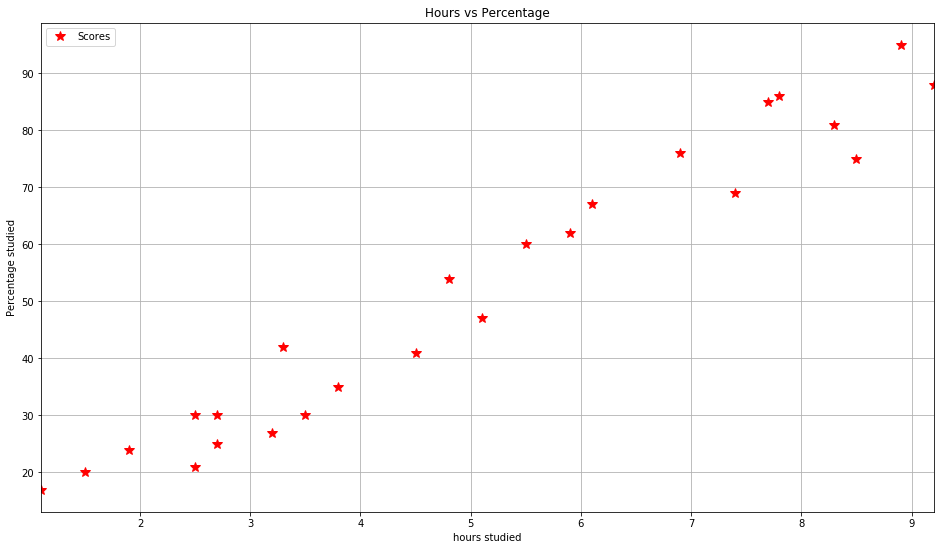

In [20]:
# plotting the dataset
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x = 'Hours', y ='Scores',style ='*', color = 'red', markersize = 10)
plt.title('Hours vs Percentage')
plt.xlabel('hours studied')
plt.ylabel('Percentage studied')
plt.grid()
plt.show()

From the above graph we can say that we can see the relationships. between 'hours studied 'Percentage studied'.we can use the linear regreesion supervised model to given values

In [21]:
#to determine relation between the data
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3: Data preparation 
we will divide the data into two parts for testing & training  model

In [22]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
#using iloc function dividing the data
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

In [24]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [25]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [26]:
# spliting data for training & testing 

from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


# Step 4 - Training the algorithm
we have splited our data into training & testing we now test the model

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Step 5 - Visualizing the model
now its time to visualize

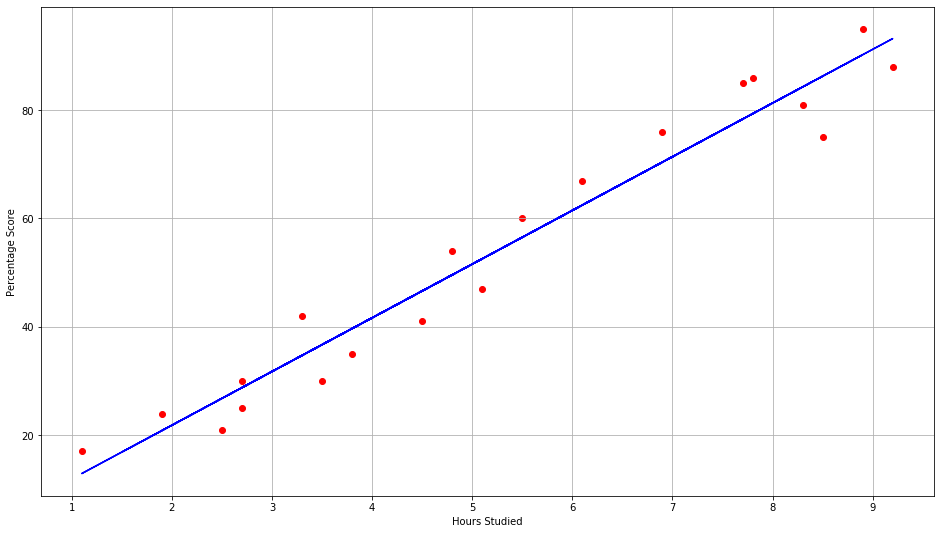

In [33]:
line = model.coef_*X + model.intercept_

# Plotting for the training data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

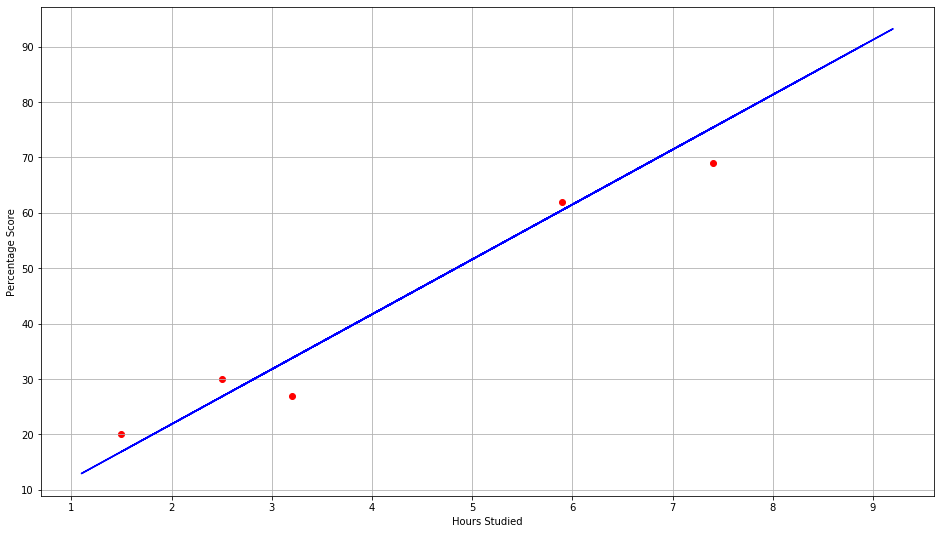

In [34]:
# Plotting for the testing data

plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

# STEP 6 - Making Predictions
 it's time to make some predictions.

In [35]:
print(X_test) # Testing data - In Hours
Y_pred = model.predict(X_test) # Predicting the scores


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparing Actual vs Predicted
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [38]:
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [42]:
#Comparing Actual vs Predicted\n",
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[Y_pred] })
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [43]:
# Testing with your own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# STEP 7 - Evaluating the model
we are going to evaluate our trained model by calculating mean absolute error

In [45]:
from sklearn import metrics 
    
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))

Mean Absolute Error: 4.183859899002982
